# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
params = {
    "appid":api_key,
    "units":"imperial"
}


data = pd.DataFrame(cities,columns=["City"])
data_lats = []
data_lons = []
data_temp = []
data_hum = []
data_wind = []
data_cloud = []
data_country = []
data_date = []

counter = 1
 
for city in cities:
    params["q"] = city

    try:
        response = requests.get(url, params=params)
        response_json = response.json()
        print(f"Processing Record {counter} | {city}")
        data_lats.append(response_json["coord"]["lat"])
        data_lons.append(response_json["coord"]["lon"])
        data_temp.append(response_json["main"]["temp_max"])
        data_hum.append(response_json["main"]["humidity"])
        data_wind.append(response_json["wind"]["speed"])
        data_cloud.append(response_json["clouds"]["all"])
        data_country.append(response_json["sys"]["country"])
        data_date.append(response_json["dt"])
        counter += 1
    except:
        print(f"City Data {city} not found. Skipping...")
        data_lats.append(np.nan)
        data_lons.append(np.nan)
        data_temp.append(np.nan)
        data_hum.append(np.nan)
        data_wind.append(np.nan)
        data_cloud.append(np.nan)
        data_country.append(np.nan)
        data_date.append(np.nan)
        counter += 1

        
print("Done!")





Processing Record 1 | saleaula
City Data saleaula not found. Skipping...
Processing Record 2 | aflu
City Data aflu not found. Skipping...
Processing Record 3 | college
Processing Record 4 | ushuaia
Processing Record 5 | ribeira grande
Processing Record 6 | sergeyevka
Processing Record 7 | albany
Processing Record 8 | bredasdorp
Processing Record 9 | atuona
Processing Record 10 | upernavik
Processing Record 11 | hermanus
Processing Record 12 | cape town
Processing Record 13 | srednekolymsk
Processing Record 14 | butaritari
Processing Record 15 | ancud
Processing Record 16 | avarua
Processing Record 17 | aklavik
Processing Record 18 | dikson
Processing Record 19 | rikitea
Processing Record 20 | castro
Processing Record 21 | bluff
Processing Record 22 | sal rei
Processing Record 23 | nizhnyaya salda
Processing Record 24 | mataura
Processing Record 25 | nioro
Processing Record 26 | busselton
Processing Record 27 | la ronge
Processing Record 28 | laguna
Processing Record 29 | barrow
Process

Processing Record 223 | yeniseysk
Processing Record 224 | mao
Processing Record 225 | mys shmidta
City Data mys shmidta not found. Skipping...
Processing Record 226 | scottsboro
Processing Record 227 | ayna
Processing Record 228 | verkhoturye
Processing Record 229 | havre
Processing Record 230 | yangliuqing
Processing Record 231 | road town
Processing Record 232 | palmer
Processing Record 233 | madang
Processing Record 234 | tevaitoa
Processing Record 235 | tulare
Processing Record 236 | mattru
Processing Record 237 | barentsburg
City Data barentsburg not found. Skipping...
Processing Record 238 | rincon
Processing Record 239 | viedma
Processing Record 240 | talcahuano
Processing Record 241 | puro
Processing Record 242 | xai-xai
Processing Record 243 | svetlyy
City Data svetlyy not found. Skipping...
Processing Record 244 | woodward
Processing Record 245 | xiazhen
Processing Record 246 | ucluelet
Processing Record 247 | yurga
Processing Record 248 | guozhen
Processing Record 249 | trom

Processing Record 444 | cascais
Processing Record 445 | acapulco
Processing Record 446 | chapais
Processing Record 447 | borogontsy
Processing Record 448 | galich
Processing Record 449 | krasnoselkup
City Data krasnoselkup not found. Skipping...
Processing Record 450 | newport
Processing Record 451 | kaz
Processing Record 452 | roma
Processing Record 453 | ilhabela
Processing Record 454 | arman
Processing Record 455 | sahuaripa
Processing Record 456 | grants
Processing Record 457 | sladkovo
Processing Record 458 | kamaishi
Processing Record 459 | cururupu
Processing Record 460 | gladstone
Processing Record 461 | solnechnyy
Processing Record 462 | athabasca
Processing Record 463 | barcelos
Processing Record 464 | mwanza
Processing Record 465 | tual
Processing Record 466 | kharan
Processing Record 467 | udarnyy
Processing Record 468 | adrar
Processing Record 469 | bhola
Processing Record 470 | sayyan
Processing Record 471 | mitu
Processing Record 472 | toungoo
City Data toungoo not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data["Lat"] = data_lats
data["Lng"] = data_lons
data["Max Temp"] = data_temp
data["Humidity"] = data_hum
data["Wind Speed"] = data_wind
data["Cloudiness"] = data_cloud
data["Country"] = data_country
data["Date"] = data_date

data_clean = data.dropna(axis=0)
data_clean = data_clean.reset_index(drop=True)

data_clean.to_csv(output_data_file)
data_clean.head(20)

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,college,64.86,-147.80,62.60,51.0,4.70,75.0,US,1.567643e+09
1,ushuaia,-54.81,-68.31,41.00,65.0,18.34,40.0,AR,1.567642e+09
2,ribeira grande,38.52,-28.70,71.79,81.0,15.01,100.0,PT,1.567643e+09
3,sergeyevka,53.88,67.42,47.31,83.0,8.14,99.0,KZ,1.567643e+09
4,albany,42.65,-73.75,71.60,88.0,8.05,75.0,US,1.567643e+09
5,bredasdorp,-34.53,20.04,48.99,87.0,4.92,70.0,ZA,1.567643e+09
6,atuona,-9.80,-139.03,79.17,73.0,11.14,44.0,PF,1.567643e+09
7,upernavik,72.79,-56.15,41.73,89.0,13.85,87.0,GL,1.567643e+09
8,hermanus,-34.42,19.24,57.00,94.0,22.88,79.0,ZA,1.567643e+09
9,cape town,-33.93,18.42,57.99,67.0,21.92,0.0,ZA,1.567642e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

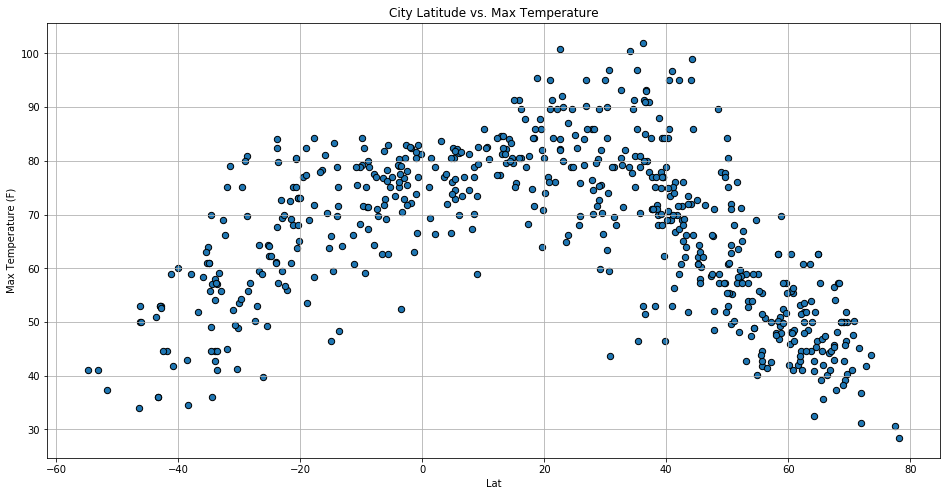

In [7]:
ax1 = data_clean.plot.scatter("Lat","Max Temp",marker="o", edgecolors="black",s=40,figsize=(16, 8))
ax1.grid()
ax1.set_title("City Latitude vs. Max Temperature")
ax1.set_ylabel("Max Temperature (F)")
plt.savefig(os.path.join("output_data","latvtemp.png"))
plt.show()

#### Latitude vs. Humidity Plot

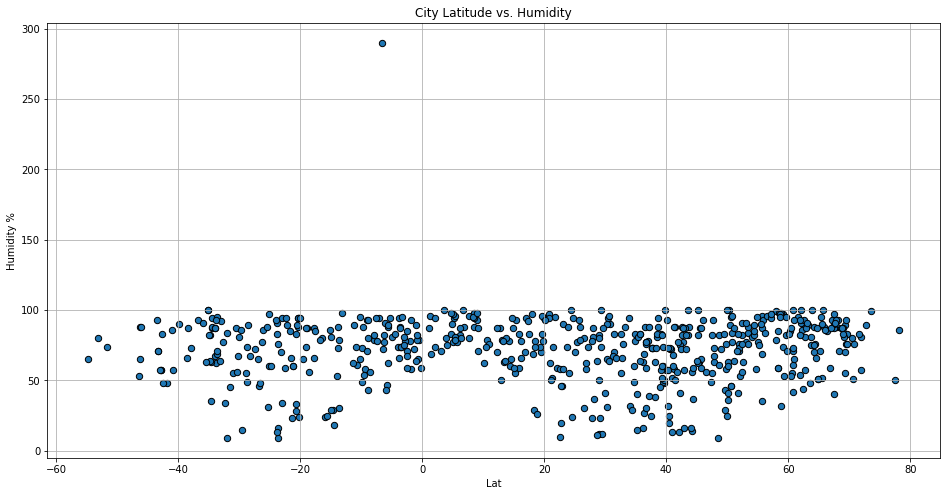

In [9]:
ax2 = data_clean.plot.scatter("Lat","Humidity",marker="o", edgecolors="black",s=40,figsize=(16, 8))
ax2.grid()
ax2.set_title("City Latitude vs. Humidity")
ax2.set_ylabel("Humidity %")
plt.savefig(os.path.join("output_data","latvhum.png"))
plt.show()

#### Latitude vs. Cloudiness Plot

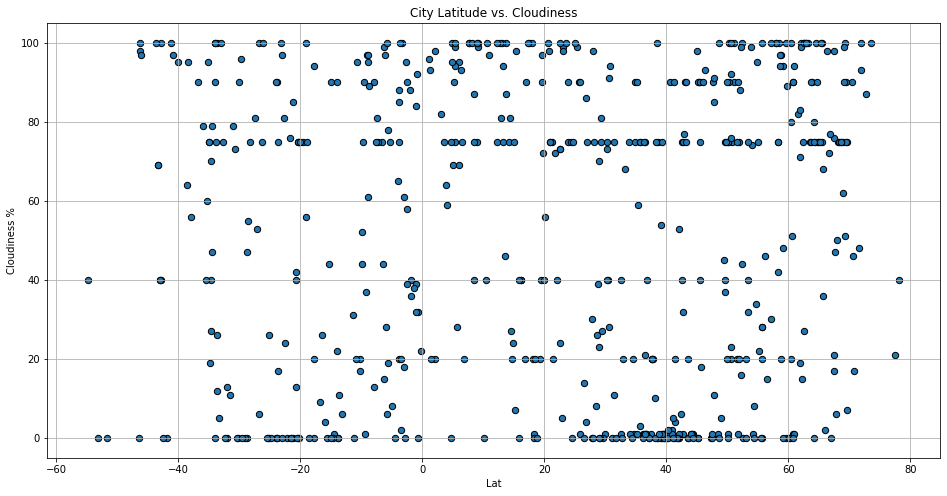

In [10]:
ax3 = data_clean.plot.scatter("Lat","Cloudiness",marker="o", edgecolors="black",s=40,figsize=(16, 8))
ax3.grid()
ax3.set_title("City Latitude vs. Cloudiness")
ax3.set_ylabel("Cloudiness %")
plt.savefig(os.path.join("output_data","latvcloud.png"))
plt.show()

#### Latitude vs. Wind Speed Plot

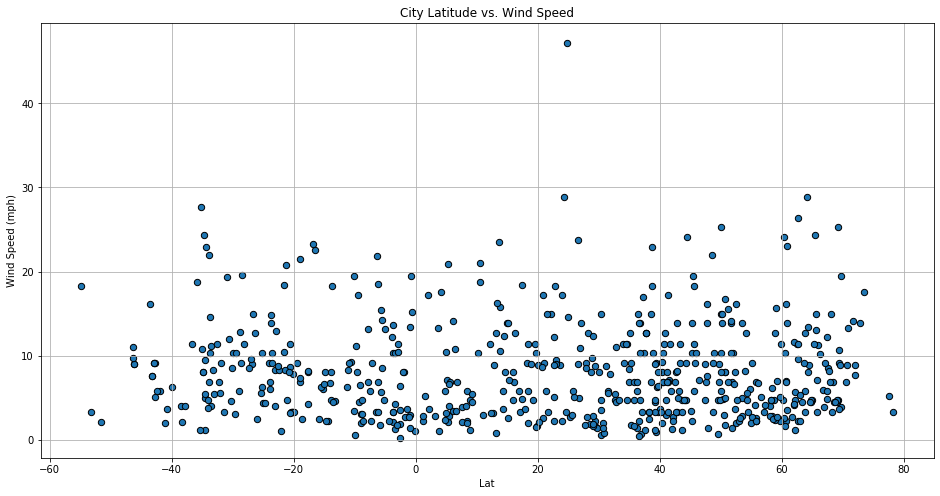

In [11]:
ax4 = data_clean.plot.scatter("Lat","Wind Speed",marker="o", edgecolors="black",s=40,figsize=(16, 8))
ax4.grid()
ax4.set_title("City Latitude vs. Wind Speed")
ax4.set_ylabel("Wind Speed (mph)")
plt.savefig(os.path.join("output_data","latvwind.png"))
plt.show()